In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# File path
file_path = "car_price_prediction_.csv"  # Ensure the file is in the same folder as the notebook

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Make sure it's in the correct directory.")

# Load dataset
df = pd.read_csv(file_path)

# Display sample records
print("Sample Records:")
print(df.head())




Sample Records:
   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   

      Price     Model  
0  26613.92   Model X  
1  14679.61  5 Series  
2  44402.61        A4  
3  86374.33   Model Y  
4  73577.10   Mustang  


In [17]:
# Select feature (independent variable) and target (dependent variable)
X = df[['Mileage']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Feature Set Shape:", X_train.shape)
print("Testing Feature Set Shape:", X_test.shape)
print("Training Target Set Shape:", y_train.shape)
print("Testing Target Set Shape:", y_test.shape)


Training Feature Set Shape: (2000, 1)
Testing Feature Set Shape: (500, 1)
Training Target Set Shape: (2000,)
Testing Target Set Shape: (500,)


In [20]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
 #Step 11: Print the parameters, i.e., intercept and slope of the regression line obtained
print(lr.params)



const      52719.088584
Mileage       -0.001705
dtype: float64


In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06042
Date:                Tue, 04 Mar 2025   Prob (F-statistic):              0.806
Time:                        23:21:55   Log-Likelihood:                -23262.
No. Observations:                2000   AIC:                         4.653e+04
Df Residuals:                    1998   BIC:                         4.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.272e+04   1211.435     43.518      0.0

Mean Squared Error: 758178642.32
Mean Absolute Error: 23786.49
Model Coefficient (Slope): -0.00
Model Intercept: 52719.09


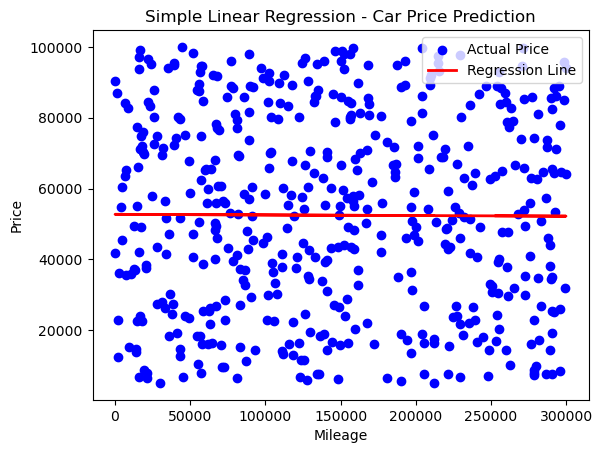

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Model Coefficient (Slope): {model.coef_[0]:.2f}')
print(f'Model Intercept: {model.intercept_:.2f}')

# Step 16: Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Simple Linear Regression - Car Price Prediction')
plt.legend()
plt.show()


In [29]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)